In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd

# تحميل البيانات
df = pd.read_csv(r'/content/combined_csv_file.csv')
pd.DataFrame(df)
print(df.head())

                                        source_title sentiment  \
0  Why Shopify Could Be the Best Stock to Buy in ...  positive   
1  Why Shopify Could Be the Best Stock to Buy in ...  positive   
2  2 Sensational Stocks "Britain's Warren Buffett...  positive   
3  The Ultimate Guide to Investing in the Vanguar...  positive   
4           Is Taiwan Semiconductor Stock a Buy Now?  positive   

                                 sentiment_reasoning ticker  
0  The article highlights Shopify's strong perfor...   SHOP  
1  The article uses Apple's successful transition...   AAPL  
2  Terry Smith has been increasing his position i...   AAPL  
3  The article mentions Apple as one of the top h...   AAPL  
4  TSMC is the world's leading semiconductor cont...    TSM  


In [ ]:
number_of_rows = df.shape[0]  # df هو اسم DataFrame الخاص بك
print(number_of_rows)

14590


# EDA
 let's explore the data

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14590 entries, 0 to 14589
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   source_title         14590 non-null  object
 1   sentiment            14590 non-null  object
 2   sentiment_reasoning  7762 non-null   object
 3   ticker               13881 non-null  object
dtypes: object(4)
memory usage: 456.1+ KB
None


In [ ]:
print(df.isnull().sum())


source_title              0
sentiment                 0
sentiment_reasoning    6828
ticker                  709
dtype: int64


In [ ]:
print(df['sentiment'].value_counts())


sentiment
positive    9004
neutral     4076
negative    1506
mixed          4
Name: count, dtype: int64


In [ ]:
df['text length'] = df['sentiment_reasoning'].astype(str).apply(len)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

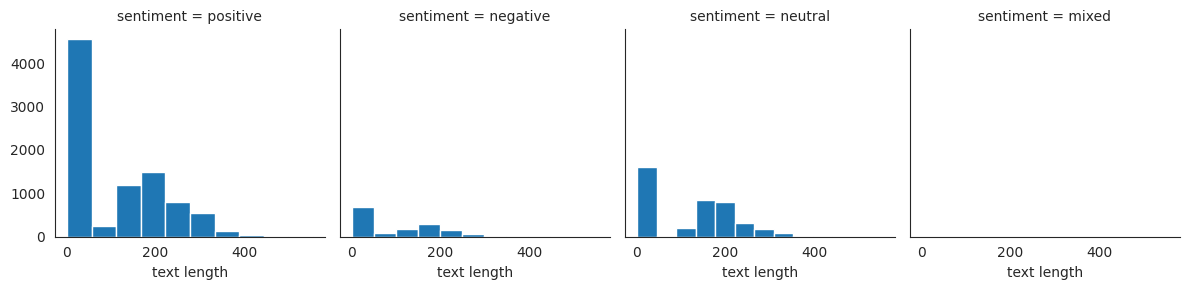

In [ ]:
g = sns.FacetGrid(df,col='sentiment')
g.map(plt.hist,'text length')

<ipython-input-12-0dc553ab5c38>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment',data=df,palette='rainbow')


<Axes: xlabel='sentiment', ylabel='count'>

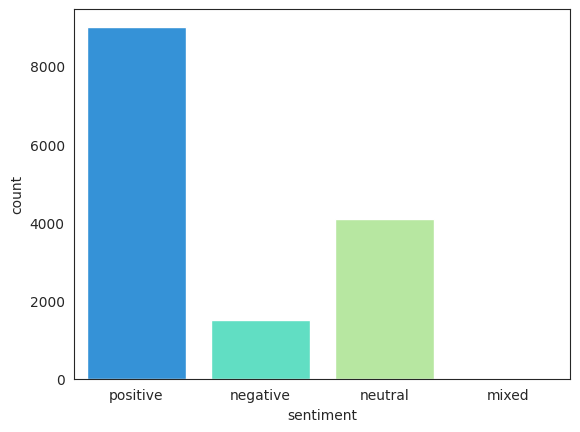

In [ ]:
sns.countplot(x='sentiment',data=df,palette='rainbow')

In [ ]:
mixed_value = 'mixed'  # Replace 'mixed' with the actual value if it's different
df = df[df['sentiment'] != mixed_value]

In [ ]:
# prompt: drop the null vales

df.dropna(inplace=True)


<ipython-input-14-240a3957c742>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


<ipython-input-15-0dc553ab5c38>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment',data=df,palette='rainbow')


<Axes: xlabel='sentiment', ylabel='count'>

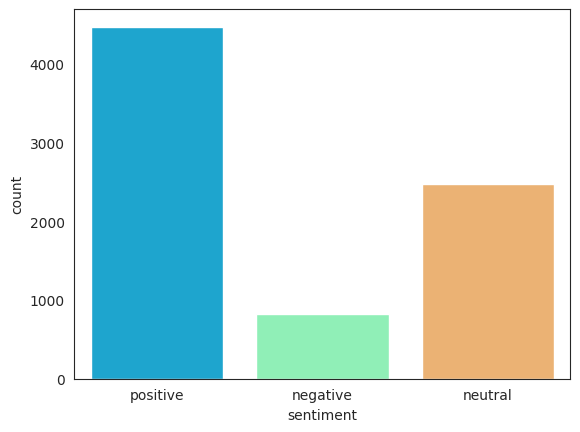

In [ ]:
sns.countplot(x='sentiment',data=df,palette='rainbow')

In [ ]:
import re

# تنظيف النصوص
def clean_text(text):
    # Check if the text is a string before applying lower()
    if isinstance(text, str):
        text = text.lower()  # تحويل النصوص لحروف صغيرة
        text = re.sub(r'\s+', ' ', text)  # إزالة المسافات الزائدة
        text = re.sub(r'https?://\S+|www\.\S+', '', text)  # إزالة الروابط
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # إزالة الرموز غير المهمة
    # If not a string (e.g., NaN), return an empty string or handle it as needed
    else:
        text = ""  # or any other appropriate handling for non-string values
    return text

df['cleaned_summary'] = df['sentiment_reasoning'].apply(clean_text)

<ipython-input-16-5119d4615c8b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_summary'] = df['sentiment_reasoning'].apply(clean_text)


In [ ]:
df.head()

,source_title,sentiment,sentiment_reasoning,ticker,text length,cleaned_summary
0,Why Shopify Could Be the Best Stock to Buy in ...,positive,The article highlights Shopify's strong perfor...,SHOP,247,the article highlights shopifys strong perform...
1,Why Shopify Could Be the Best Stock to Buy in ...,positive,The article uses Apple's successful transition...,AAPL,175,the article uses apples successful transition ...
2,"2 Sensational Stocks ""Britain's Warren Buffett...",positive,Terry Smith has been increasing his position i...,AAPL,279,terry smith has been increasing his position i...
3,The Ultimate Guide to Investing in the Vanguar...,positive,The article mentions Apple as one of the top h...,AAPL,156,the article mentions apple as one of the top h...
4,Is Taiwan Semiconductor Stock a Buy Now?,positive,TSMC is the world's leading semiconductor cont...,TSM,253,tsmc is the worlds leading semiconductor contr...


<Figure size 1000x600 with 0 Axes>

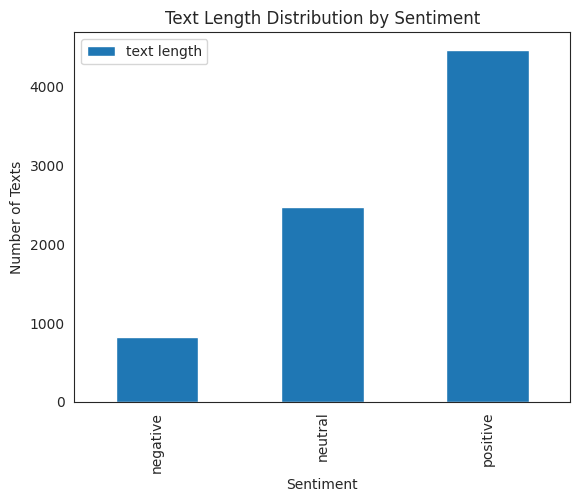

In [ ]:
# prompt: stacked bar for the text length based on sentiment label

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has 'sentiment' and 'text length' columns
sentiment_counts = df.groupby('sentiment')['text length'].count().reset_index()

plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', x='sentiment', y='text length')
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Texts')
plt.show()


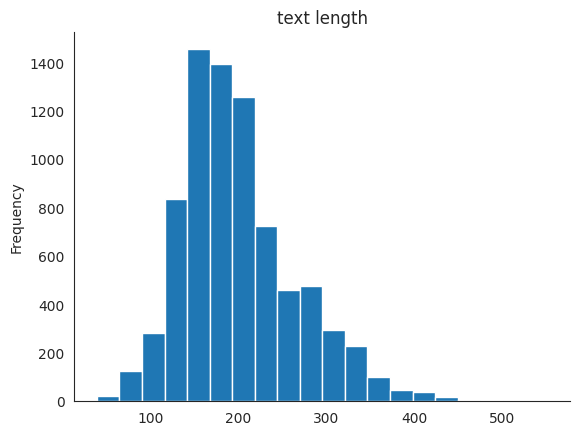

In [ ]:
# @title text length

from matplotlib import pyplot as plt
df['text length'].plot(kind='hist', bins=20, title='text length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:

# تقسيم البيانات إلى تدريب واختبار
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['cleaned_summary'], df['sentiment'], test_size=0.2, random_state=42
)

print("عدد العينات في التدريب:", len(train_texts))
print("عدد العينات في الاختبار:", len(test_texts))

عدد العينات في التدريب: 6209
عدد العينات في الاختبار: 1553


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from datasets import Dataset as HFDataset
from tqdm import tqdm

In [ ]:
# 🔹 2. تجهيز النصوص ودمج العنوان مع الملخص
df["text"] = df['source_title'] + " " + df["cleaned_summary"]

# 🔹 3. تحويل المشاعر إلى أرقام (Labels)
label_map = {"neutral": 0, "positive": 1, "negative": 2}
df["label"] = df["sentiment"].map(label_map)

# 🔹 4. تحميل Tokenizer الخاص بـ FinBERT
model_name = "yiyanghkust/finbert-tone"

tokenizer = AutoTokenizer.from_pretrained(model_name)

# 🔹 5. تحويل النصوص إلى Tokens

encodings = tokenizer(df["text"].tolist(), truncation=True, padding=True, max_length=512)



<ipython-input-23-49cf596fb1c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df['source_title'] + " " + df["cleaned_summary"]
<ipython-input-23-49cf596fb1c6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["sentiment"].map(label_map)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggin

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
# 🔹 6. إنشاء Dataset من بياناتك الخاصة
class NewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}, torch.tensor(self.labels[idx])

train_dataset = NewsDataset(encodings, df["label"].tolist())

In [ ]:

# 🔹 7. تجهيز DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)


In [ ]:
# 🔹 8. تحميل FinBERT Model (Pretrained) مع 3 تصنيفات
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [ ]:
# 🔹 9. تحديد الجهاز (GPU إذا متوفر)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# 🔹 10. تحديد Optimizer والـ Loss Function
optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = nn.CrossEntropyLoss()

# 🔹 11. تدريب النموذج 🚀
epochs = 3  # عدد الدورات التدريبية
model.train()

for epoch in range(epochs):
    loop = tqdm(train_loader, leave=True)
    total_loss = 0

    for batch in loop:
        inputs, labels = batch
        inputs = {key: val.to(device) for key, val in inputs.items()}
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = loss_fn(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

    print(f"Epoch {epoch+1} Loss: {total_loss / len(train_loader)}")


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(

Epoch 1: 100%|██████████| 971/971 [03:01<00:00,  5.35it/s, loss=0.00133]


Epoch 1 Loss: 0.19993722072554432


Epoch 2: 100%|██████████| 971/971 [02:53<00:00,  5.58it/s, loss=3.45e-5]


Epoch 2 Loss: 0.07595188219742777


Epoch 3: 100%|██████████| 971/971 [02:54<00:00,  5.57it/s, loss=0.018]

Epoch 3 Loss: 0.05900641376868395


In [ ]:

# 🔹 12. حفظ النموذج المدرب
model.save_pretrained("finbert_finetuned")
tokenizer.save_pretrained("finbert_finetuned")
print("✅ النموذج تم حفظه بنجاح!")


✅ النموذج تم حفظه بنجاح!


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np

# 🔹 1. تحميل النموذج المدرب
model_path = "finbert_finetuned"  # تأكد أنه نفس المسار الذي حفظت فيه النموذج
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# 🔹 2. تجهيز الجهاز (GPU إن وجد)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # تفعيل وضع التقييم

# 🔹 3. قائمة الأخبار الجديدة لاختبار النموذج
new_headlines = [
    "Tesla shares rise after record-breaking quarterly earnings",
    "Apple stock falls due to global supply chain issues",
    "Microsoft announces major acquisition in AI sector"
]

# 🔹 4. تحويل الأخبار إلى Tokens
encodings = tokenizer(new_headlines, truncation=True, padding=True, max_length=512, return_tensors="pt").to(device)

# 🔹 5. تمرير البيانات إلى النموذج والحصول على التنبؤات
with torch.no_grad():
    outputs = model(**encodings)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)  # تحويل القيم إلى احتمالات

# 🔹 6. تحويل النتائج إلى تصنيفات مفهومة
label_map = {0: "Neutral", 1: "Positive", 2: "Negative"}
predicted_labels = [label_map[np.argmax(pred.cpu().numpy())] for pred in predictions]

# 🔹 7. طباعة النتائج
for headline, sentiment in zip(new_headlines, predicted_labels):
    print(f"📰 الخبر: {headline}\n📊 التصنيف: {sentiment}\n")


📰 الخبر: Tesla shares rise after record-breaking quarterly earnings
📊 التصنيف: Positive

📰 الخبر: Apple stock falls due to global supply chain issues
📊 التصنيف: Negative

📰 الخبر: Microsoft announces major acquisition in AI sector
📊 التصنيف: Positive

